In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [249]:
#variables 
seed = 1161
N_train = int(201)
N_test = int(101)
K = np.arange(1,61)
N_fold = 5
M = 5 #ideal M calculated from assignment 1

In [250]:
#Equations 
def f_opt(x):
    return np.sin(2.0 * np.pi * x)

In [251]:
#calculate the RMSE 
def rmse(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

In [252]:
#Generate the test, vaildation, and training set 
def generate_sets(seed, N_train, N_test):
    x_tr = np.linspace(0, 1, N_train)
    x_te =np.linspace(0, 1, N_test)
    np.random.randn(seed)
    t_tr = f_opt(x_tr) + 0.2*np.random.randn(N_train)
    t_te = f_opt(x_te) + 0.2*np.random.randn(N_test)
    return x_tr, t_tr, x_te, t_te

In [253]:
def eucladian_distance (x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [254]:
def eu_distances (N_test, N_train, x_te, x_tr):
    #this function will make a matrix of size (N_test, N_train) 
    #There will be N_test Rows and each row has the distance of the test point to each training point 
    #compute the distances 
    #distances = [eucladian_distance(x_test, x_train)]
    #get the closest k
    #argsort:tells you where the orginal indices from the x_train would be after they are sorted
    #k_indices = np.argsort(distances)
    distances = np.zeros((N_test, N_train), dtype = float)
    for i in range (N_test):
        for j in range (N_train):
            distances[i,j] = eucladian_distance(x_te[i], x_tr[j])
    k_indices = np.argsort(distances)
    return distances, k_indices 

In [255]:
def y_pred (N_test, k, k_indices, t_tr):
    y_pred = np.zeros ((N_test), dtype= float)
    for i in range (N_test):
        sum_avg=0
        for x in k_indices[i, :k]:
            sum_avg += t_tr[x]
        y_pred[i] = sum_avg/k
    return y_pred

In [256]:
def shift (x_tr, t_tr, n):
    #x is the array. it is the size of x_test because that is the size of the split for test 
    x_tr = np.roll(x_tr, n)
    t_tr = np.roll(t_tr, n)
    return x_tr, t_tr

In [269]:
def main():
    x_tr, t_tr, x_te, t_te = generate_sets(seed, N_train, N_test)
    dist, k_indices = eu_distances(N_test, N_train, x_te, x_tr)
    rmse_k = np.zeros(60)
    for k in range(0,60):
        y_pre = y_pred(N_test, k+1, k_indices, t_tr)
        r_te = rmse(t_te, y_pre)
        rmse_k[k]=r_te
        plt.title(f'K={k+1} ')
        x_plot = np.linspace(0.0, 1.0, 400)
        f_opt_plot = np.sin(2 * np.pi * x_plot)
        
        plt.scatter(x_tr, t_tr, label= "Train Points")
        plt.scatter(x_te, t_te, label = "Test Points") #test data 
        plt.plot(x_plot, f_opt_plot,  label="Optimal Prediction")
        plt.plot(x_te, y_pre,  label = "k-NN Prediction") #y_one is predicted values
        plt.legend()
        plt.show() 
    rmse_k=rmse_k.T
    #k-fold 
    X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
    n = X_test.shape
    rmse_k_fold = np.zeros((60, 5), dtype=float) #the shape is going to be (k=60, 5 folds)
    
    for k in range(0,60):
        #x_tr = np.roll(x_tr, n)
        #t_tr = np.roll(t_tr, n)
        #X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
        k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)
        Nk_test = X_test.shape[0]
        Nk_train = X_train.shape[0]
        #using w from assignment 1 to get the RMSE curve. 
        dist, k_indices = eu_distances(Nk_test, Nk_train, X_test, X_train)
        y_pre = y_pred(Nk_test, k+1, k_indices, y_train)
        r_te = rmse(y_test, y_pre)
        rmse_k_fold[k,0] = r_te #for fold 1
        for i in range (1, 5):
            #x_tr = np.roll(x_tr, n)
            #t_tr = np.roll(t_tr, n)
            #X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
            k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)
            Nk_test = X_test.shape[0]
            Nk_train = X_train.shape[0]
            #using w from assignment 1 to get the RMSE curve. 
            dist, k_indices = eu_distances(Nk_test, Nk_train, X_test, X_train)
            y_pre = y_pred(Nk_test, k+1, k_indices, y_train)
            r_te = rmse(y_test, y_pre)
            rmse_k_fold[k, i] = r_te
    
   """ rmse_kavg = np.mean(rmse_k_fold, axis=1)
    rmse_kavg = rmse_kavg.reshape(-1, 1) #(-1, 1) shapes to intuitive shape
    plt.plot(K,rmse_k, label= 'Training MSE')
    plt.plot(K,rmse_kavg, label= '5-fold CV MSE')
    plt.show()"""

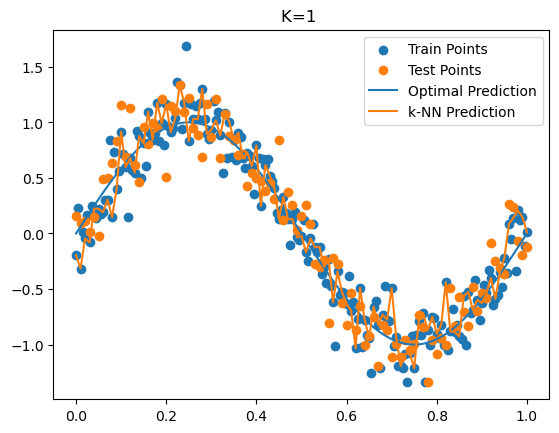

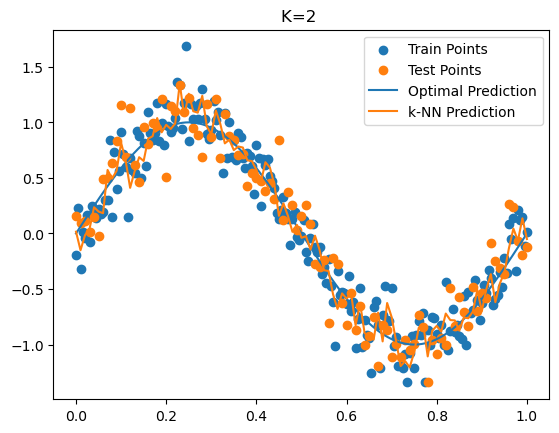

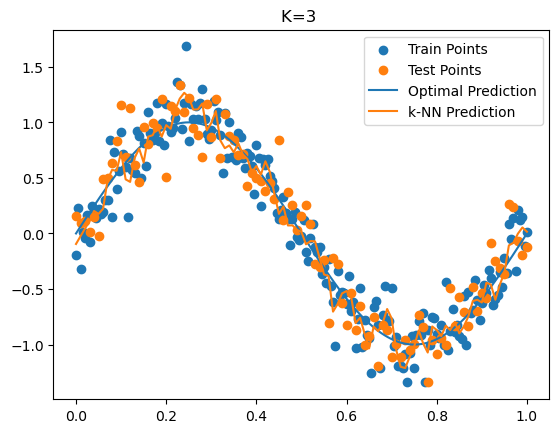

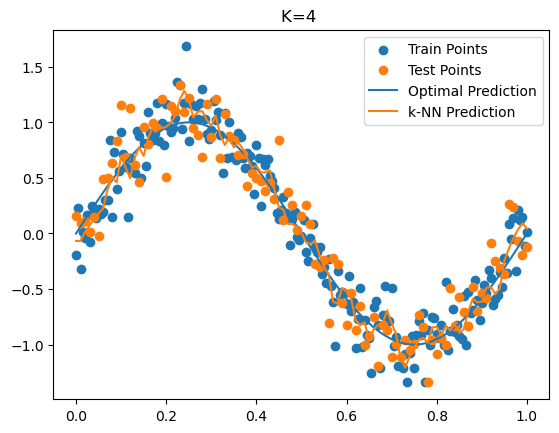

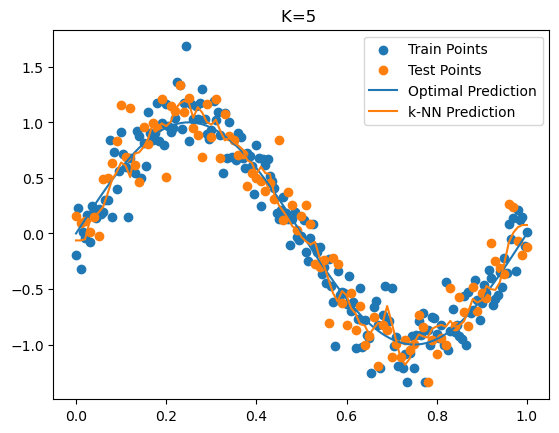

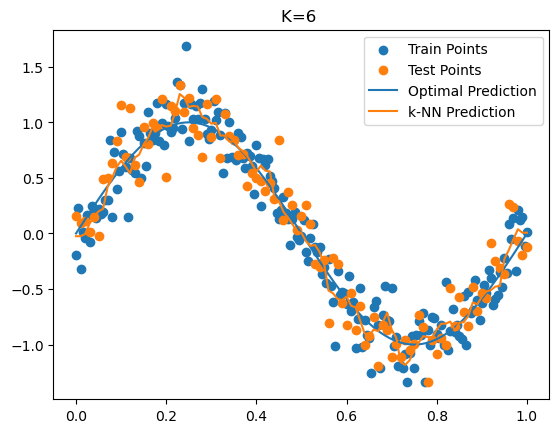

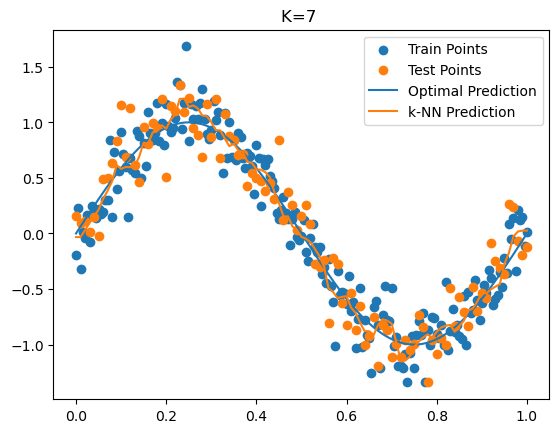

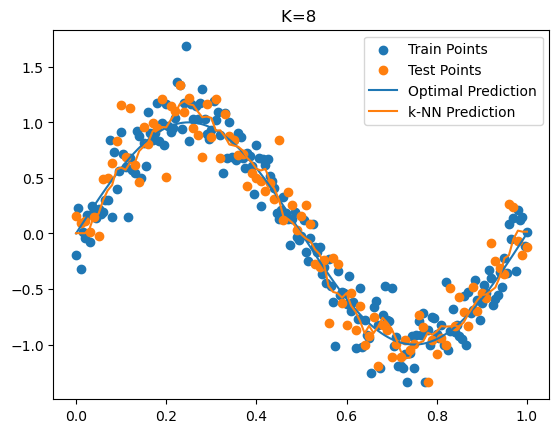

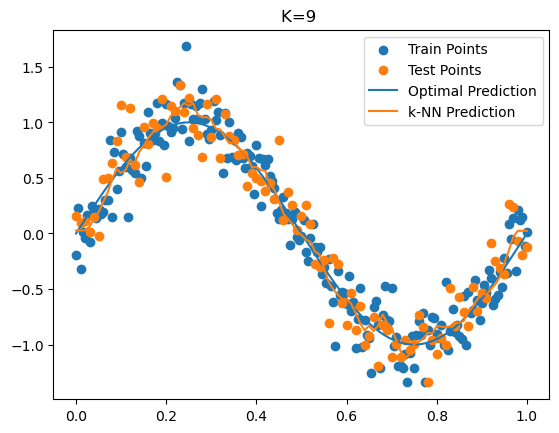

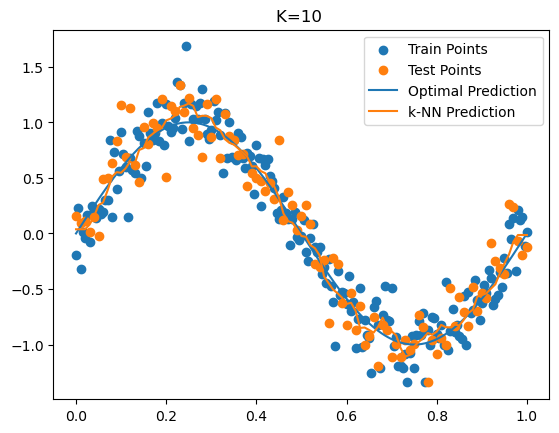

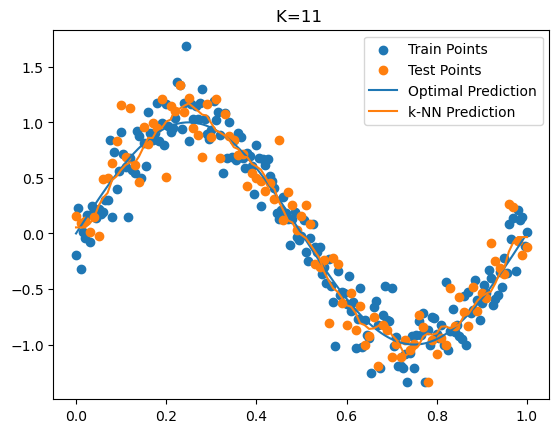

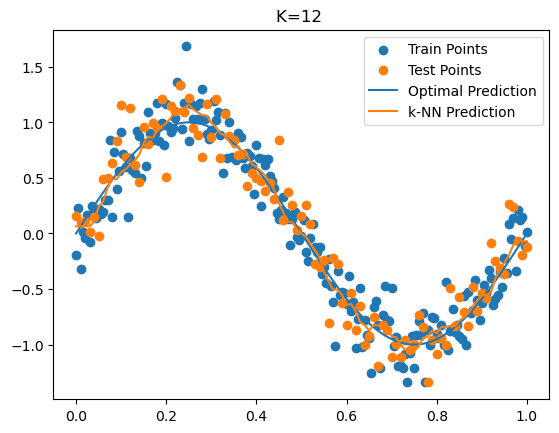

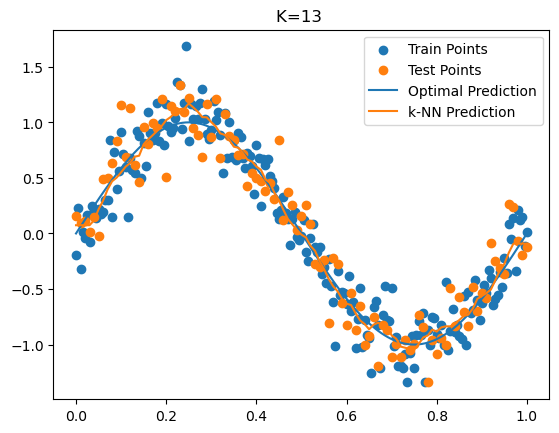

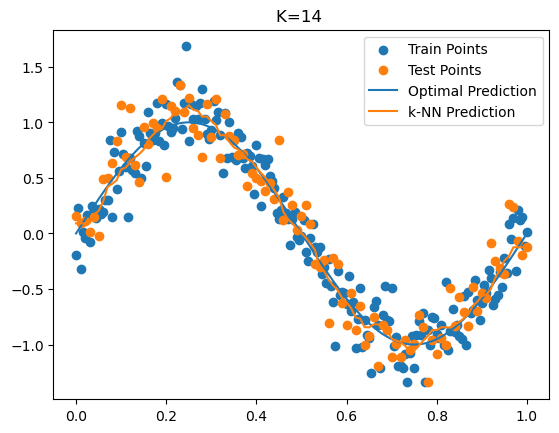

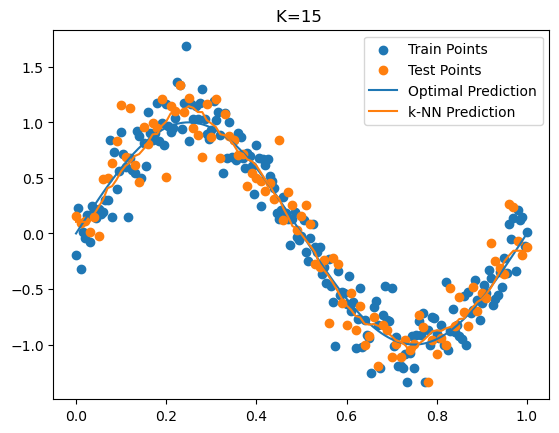

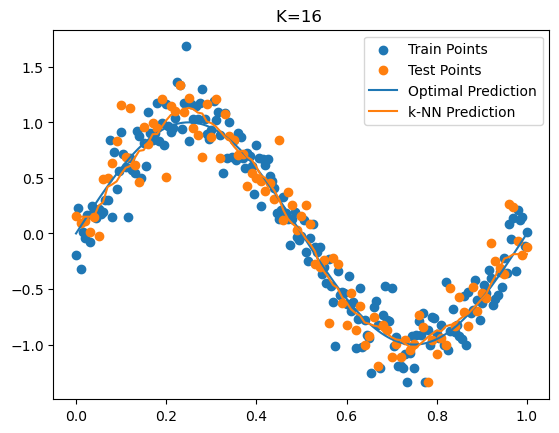

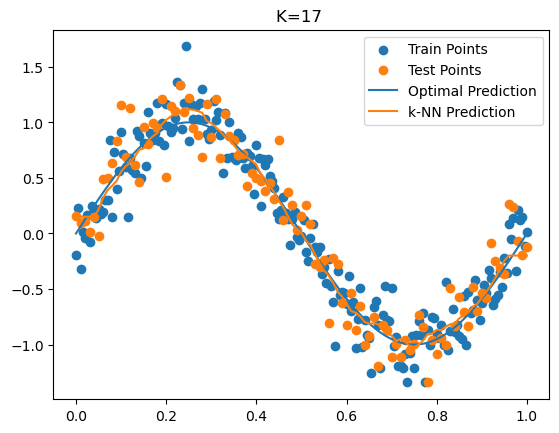

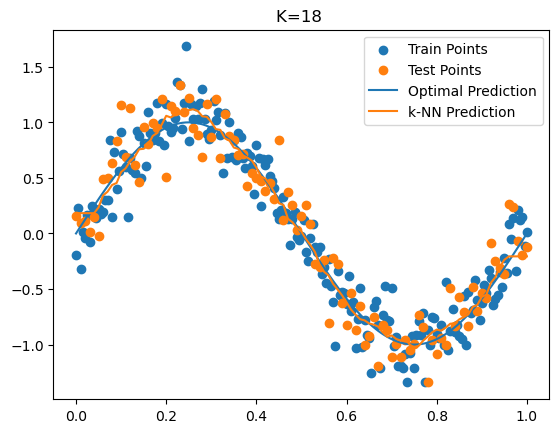

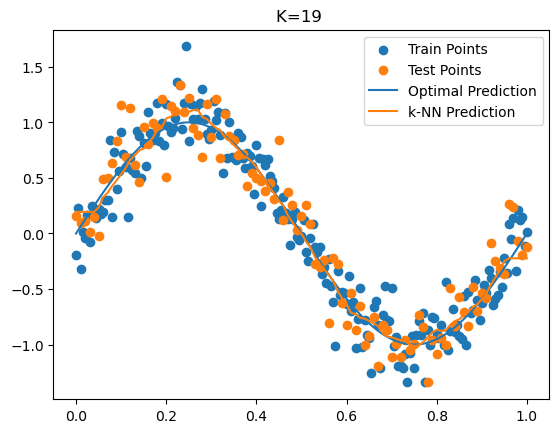

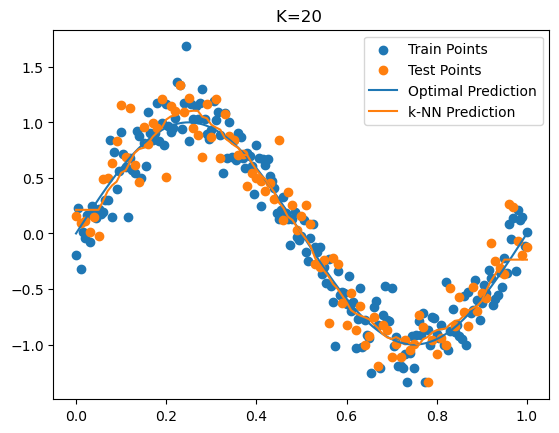

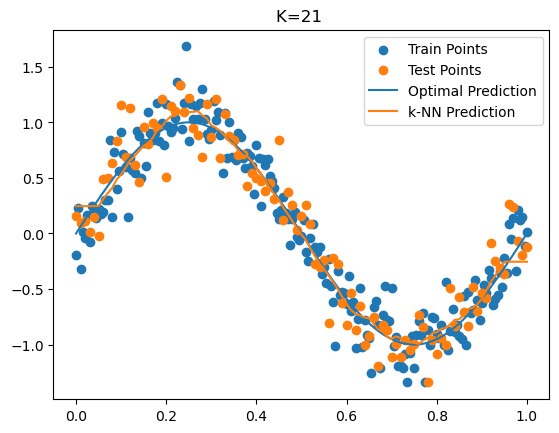

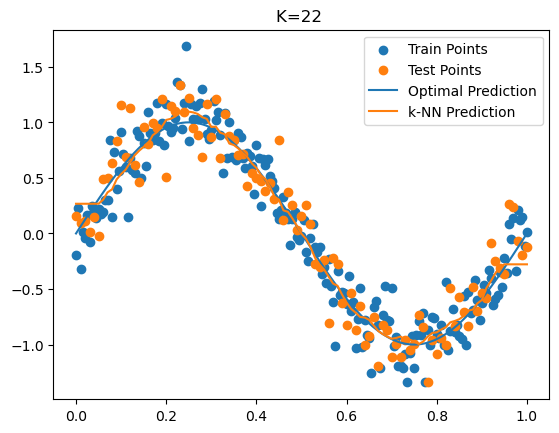

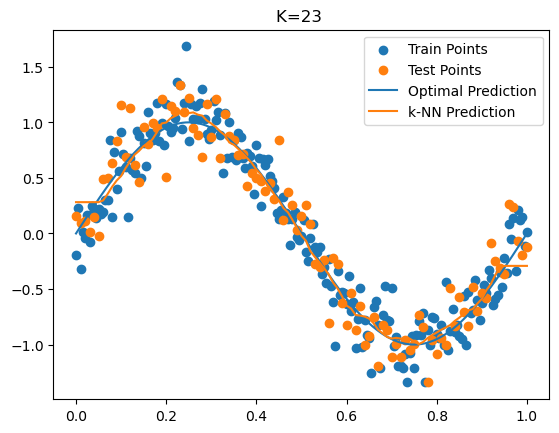

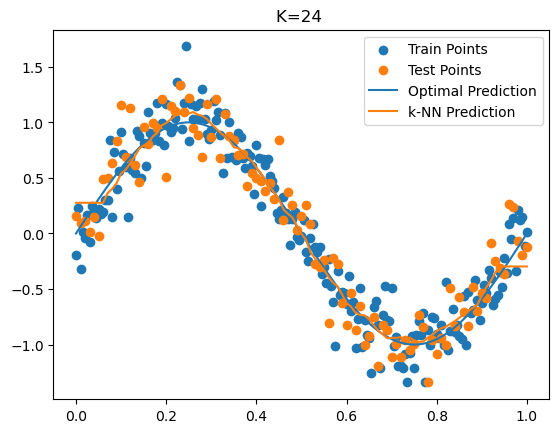

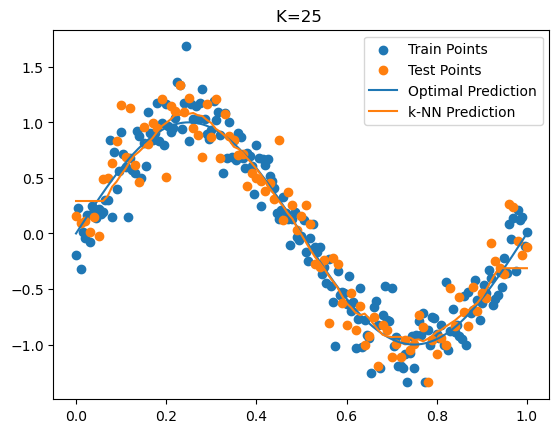

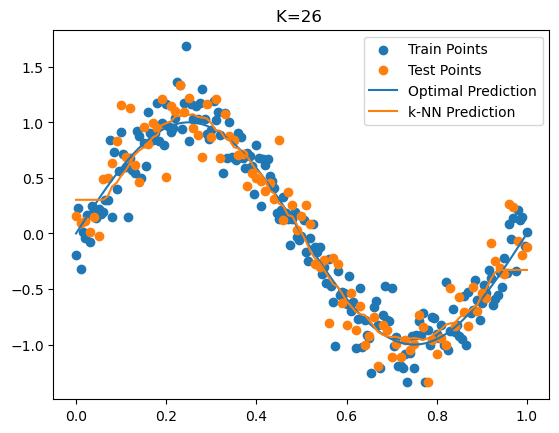

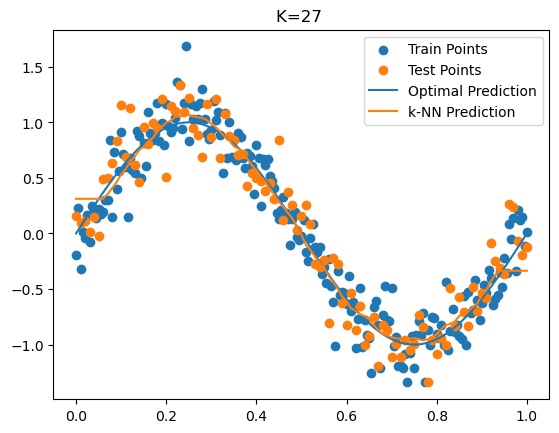

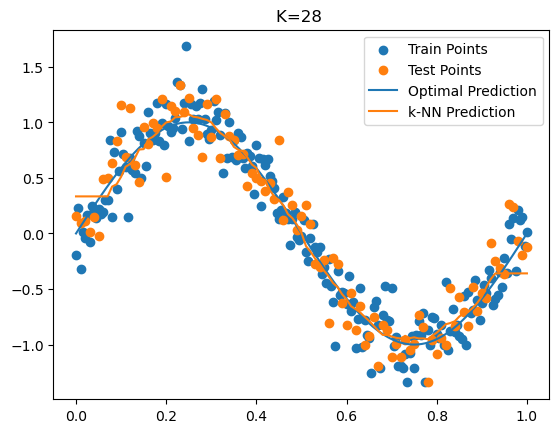

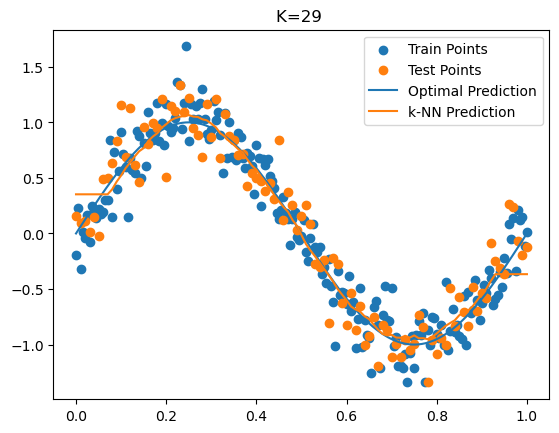

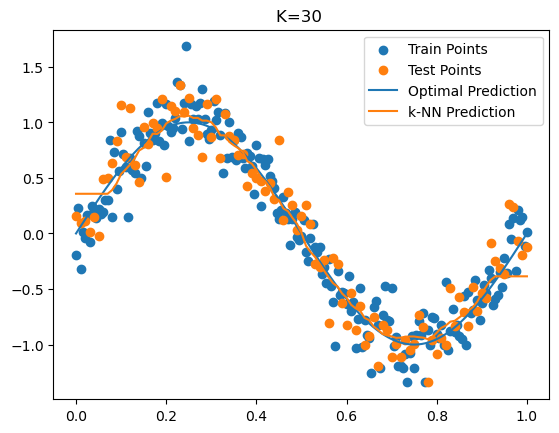

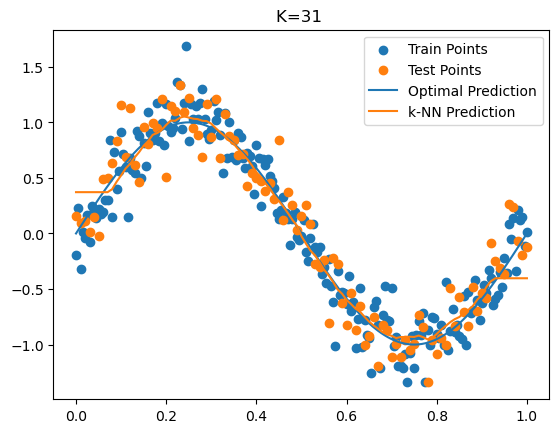

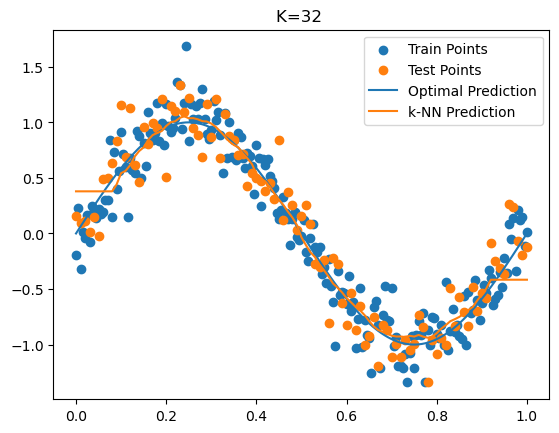

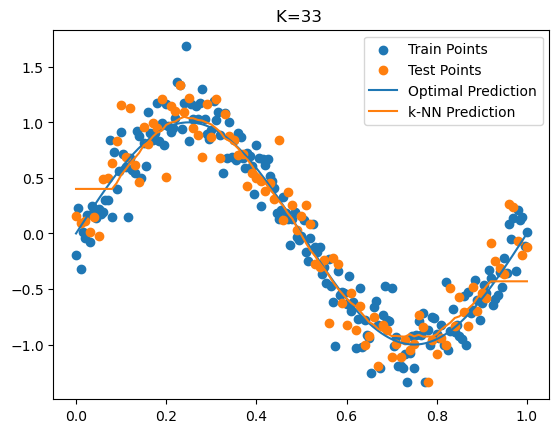

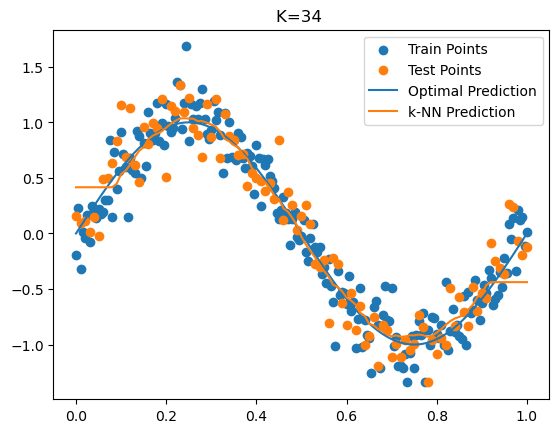

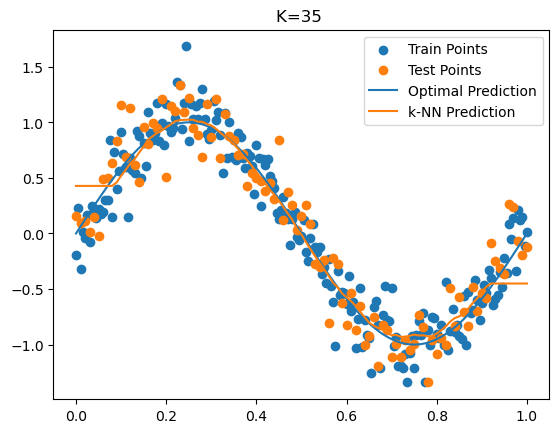

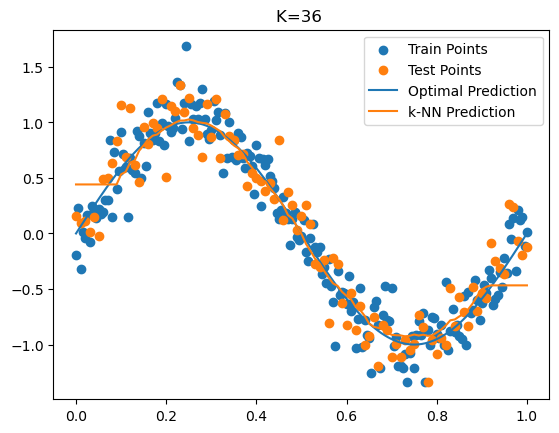

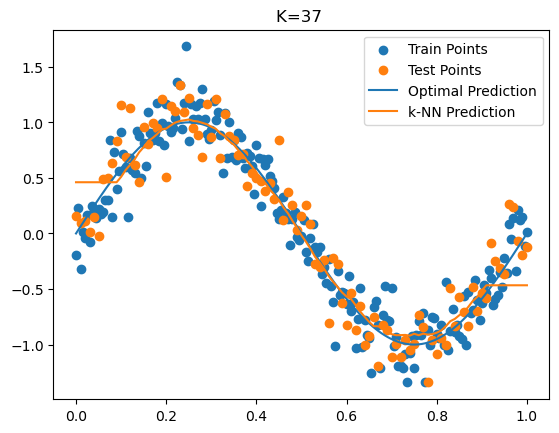

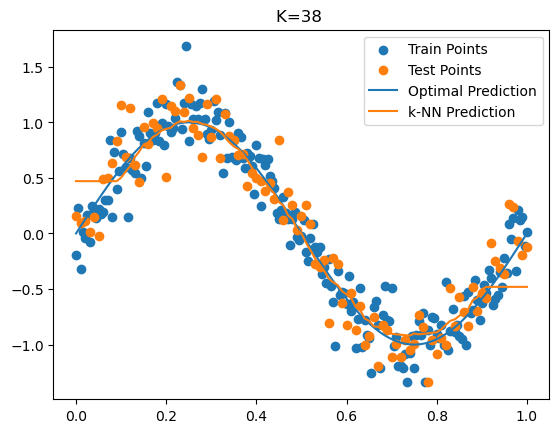

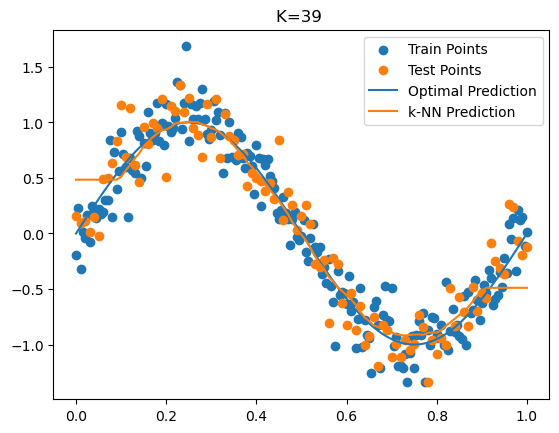

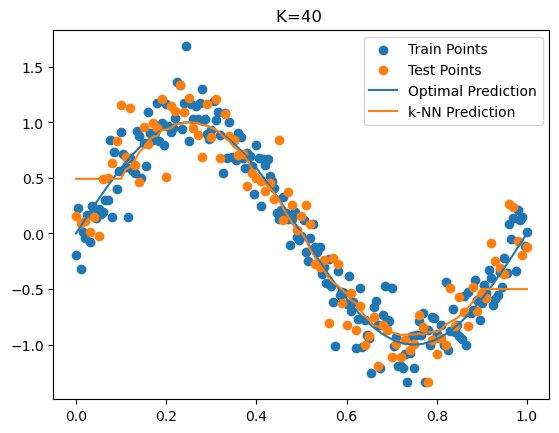

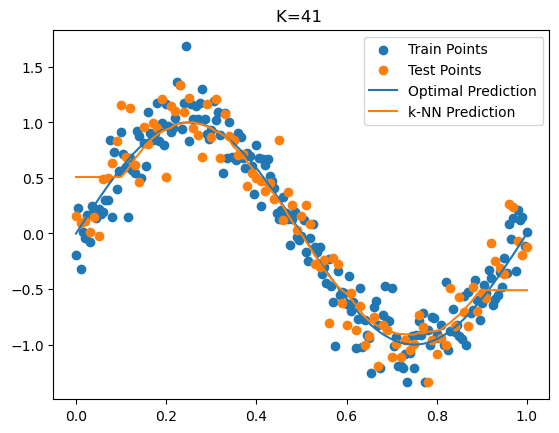

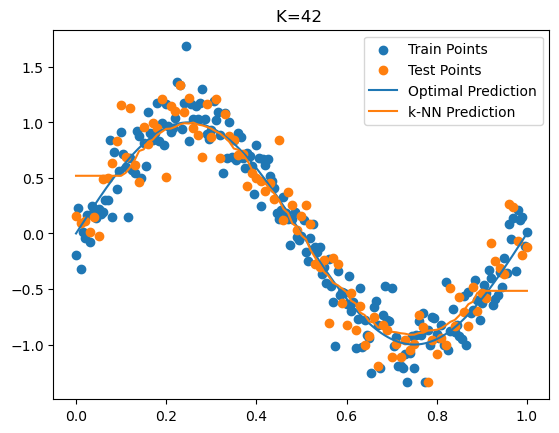

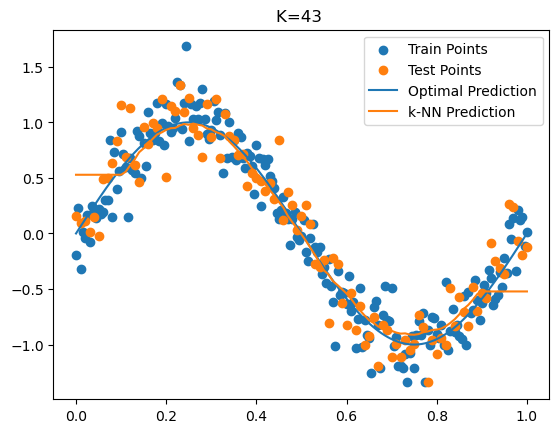

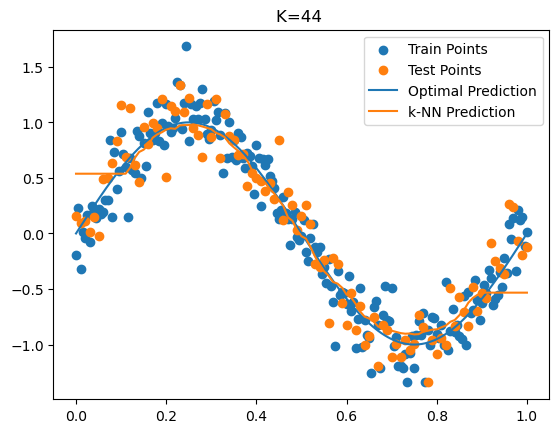

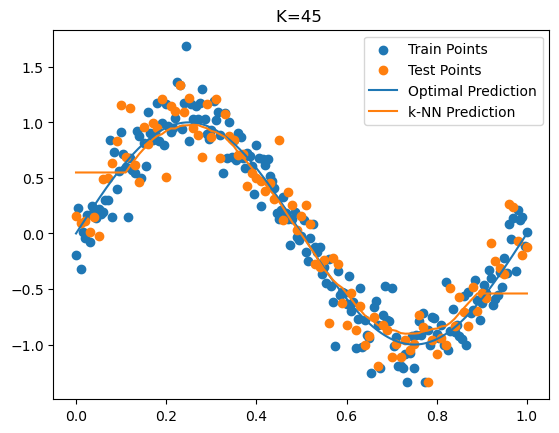

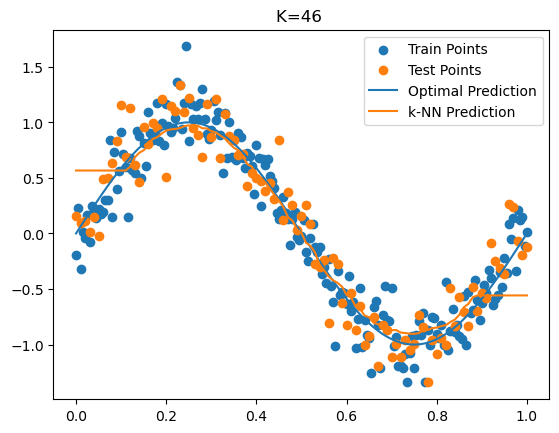

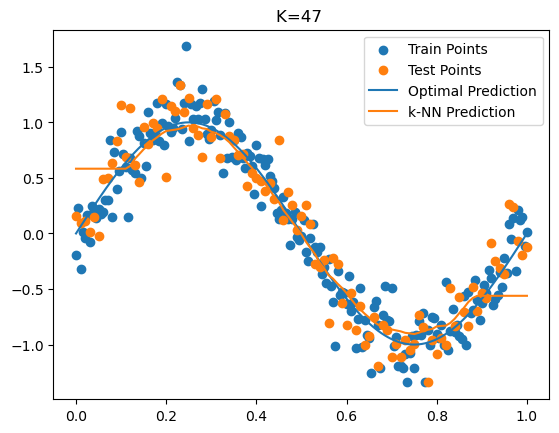

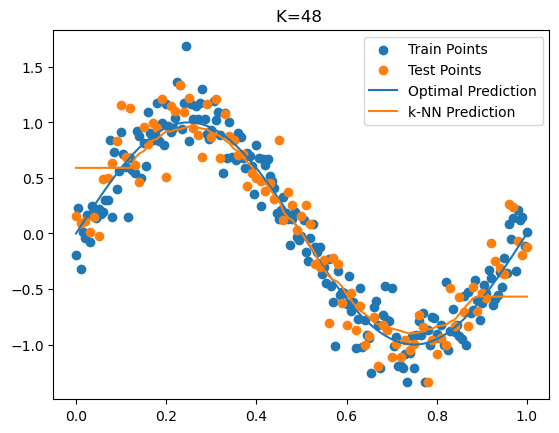

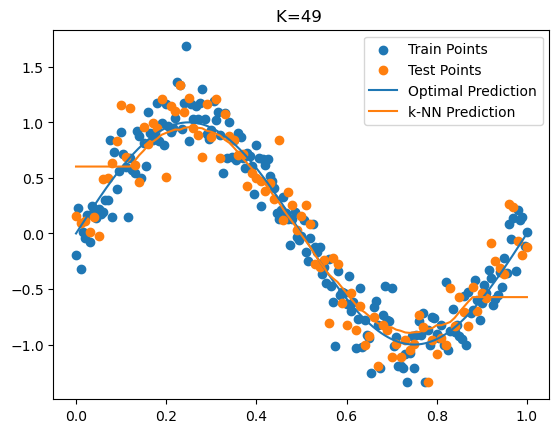

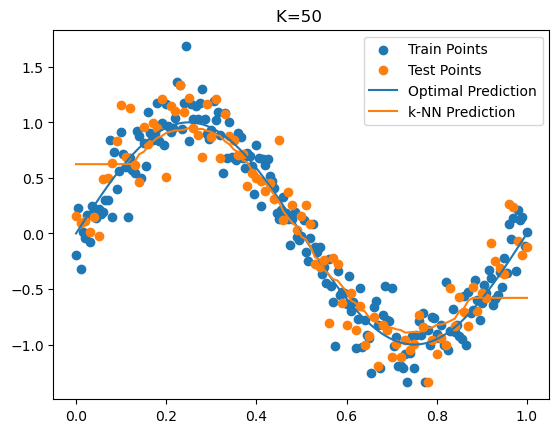

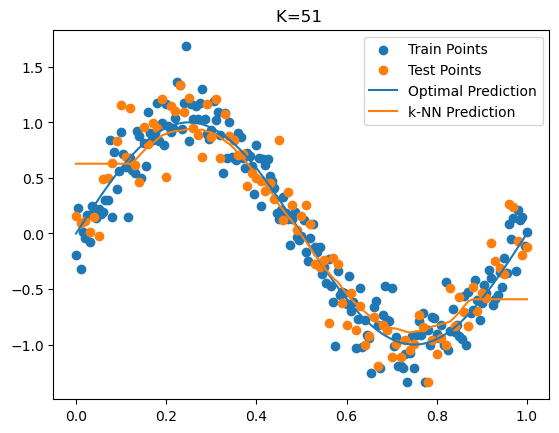

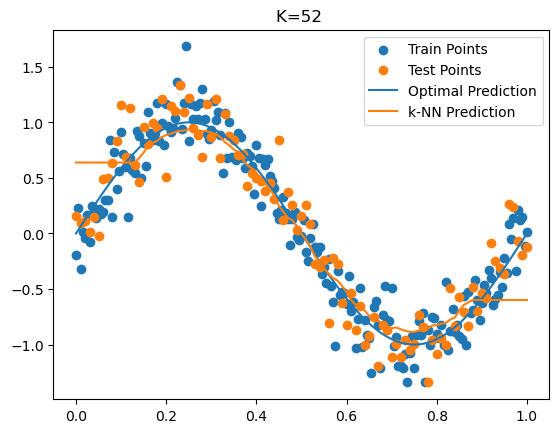

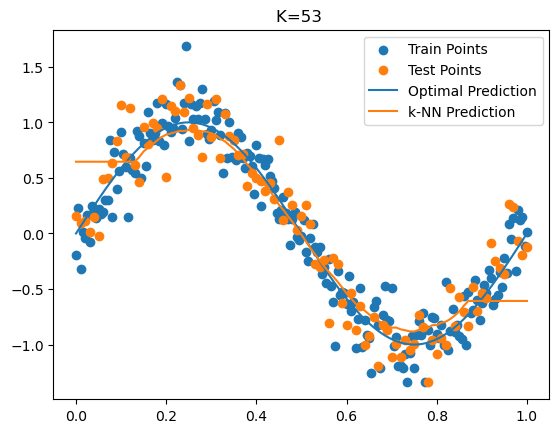

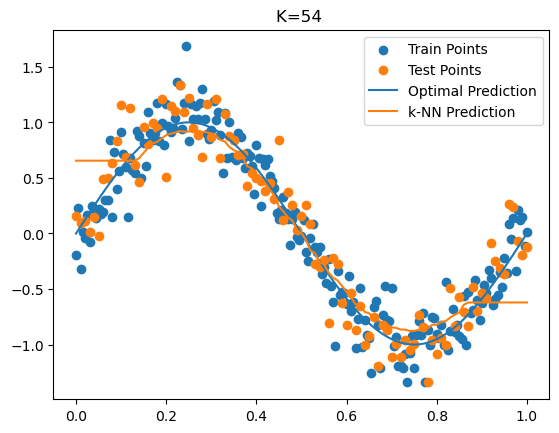

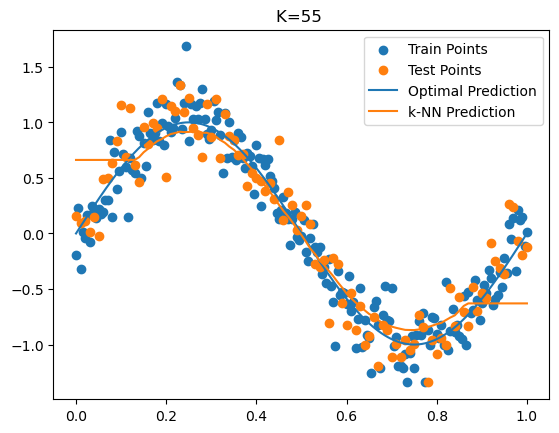

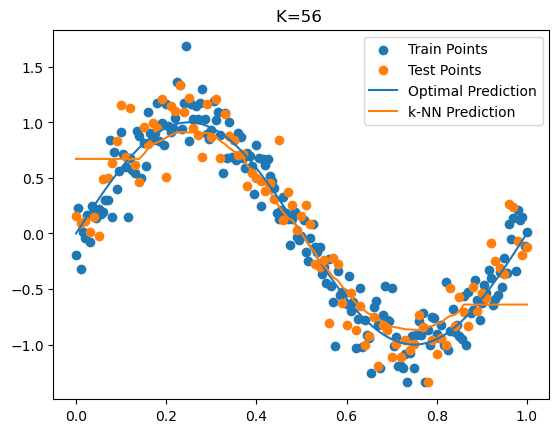

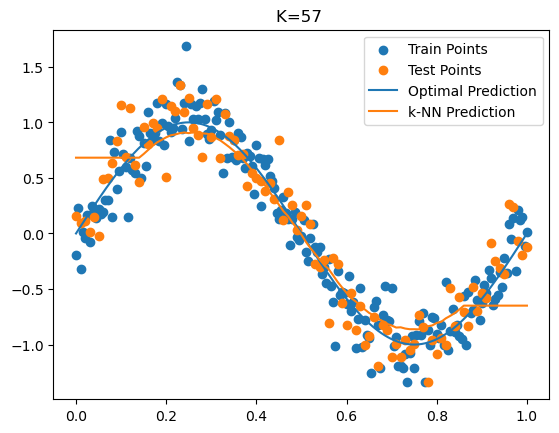

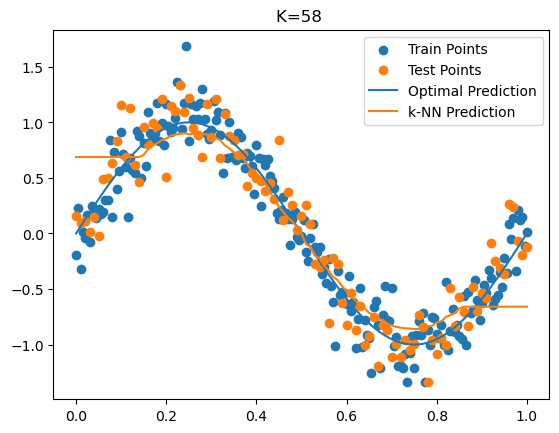

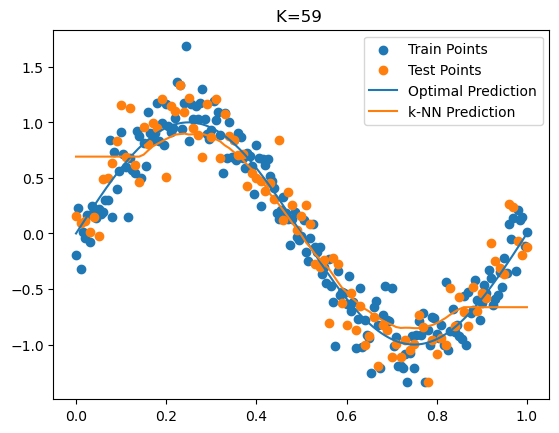

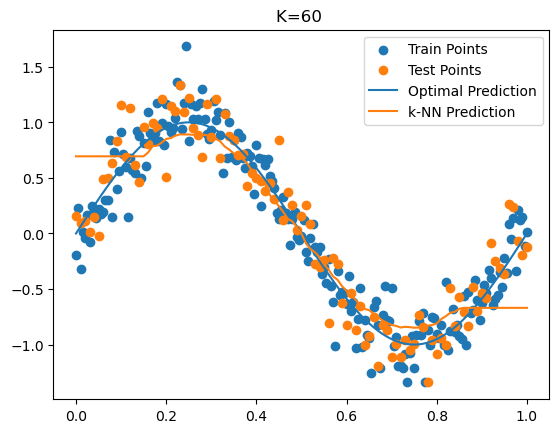

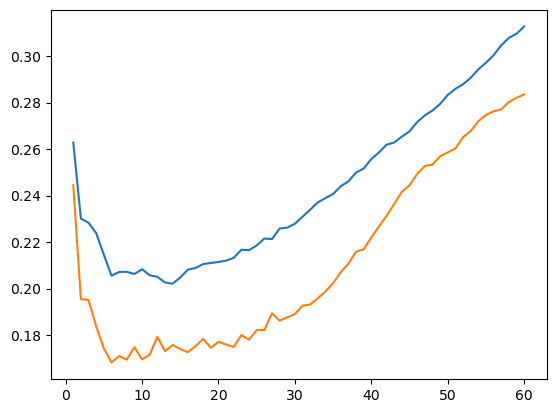

In [270]:
main()

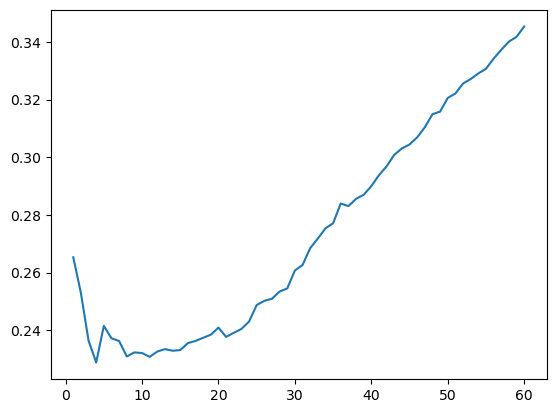

In [264]:
x_tr, t_tr, x_te, t_te = generate_sets(seed, N_train, N_test)
X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
n = X_test.shape
rmse_k_fold = np.zeros((60, 5), dtype=float) #the shape is going to be (k=60, 5 folds)

for k in range(0,60):
    #x_tr = np.roll(x_tr, n)
    #t_tr = np.roll(t_tr, n)
    #X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
    k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)
    Nk_test = X_test.shape[0]
    Nk_train = X_train.shape[0]
    #using w from assignment 1 to get the RMSE curve. 
    dist, k_indices = eu_distances(Nk_test, Nk_train, X_test, X_train)
    y_pre = y_pred(Nk_test, k+1, k_indices, y_train)
    r_te = rmse(y_test, y_pre)
    rmse_k_fold[k,0] = r_te #for fold 1
    for i in range (1, 5):
        #x_tr = np.roll(x_tr, n)
        #t_tr = np.roll(t_tr, n)
        #X_train, X_test, y_train, y_test = train_test_split(x_tr, t_tr, test_size=0.2)
        
        Nk_test = X_test.shape[0]
        Nk_train = X_train.shape[0]
        #using w from assignment 1 to get the RMSE curve. 
        dist, k_indices = eu_distances(Nk_test, Nk_train, X_test, X_train)
        y_pre = y_pred(Nk_test, k+1, k_indices, y_train)
        r_te = rmse(y_test, y_pre)
        rmse_k_fold[k, i] = r_te

rmse_kavg = np.mean(rmse_k_fold, axis=1)
rmse_kavg = rmse_kavg.reshape(-1, 1) #(-1, 1) shapes to intuitive shape

plt.plot(K, rmse_kavg) #y_one is predicted values
plt.show()